# Apple stock analysis:

First let's take a look for the historical data that i dowloand from yahoo finance to an csv file.

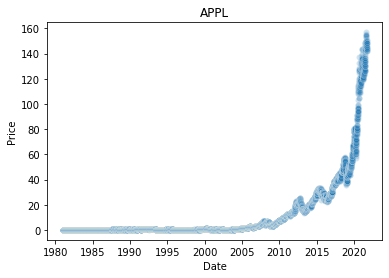

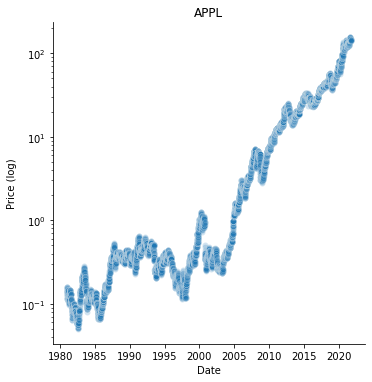

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
price=pd.read_csv('AAPL (1).csv')
price.head()


price['Date']= pd.to_datetime(price['Date'])
sns.scatterplot(x='Date',y='Open',data=price,alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('APPL')
plt.show()

g=sns.relplot(x='Date',y='Open',data=price,alpha=0.2,kind="scatter")
g.set(yscale="log")
plt.xlabel('Date')
plt.ylabel('Price (log)')
plt.title('APPL')
plt.show()


Now let's take a look over the historical dividends.

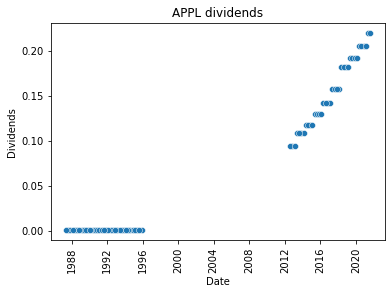

In [2]:
dividends=pd.read_csv('AAPL.csv')
dividends.head()
dividends['Date']= pd.to_datetime(dividends['Date'])
sns.scatterplot(x='Date',y='Dividends',data=dividends)
plt.xlabel('Date')
plt.ylabel('Dividends')
plt.title('APPL dividends')
plt.xticks(rotation = 90)
plt.show()

Let's to see the relationship between that two variables.

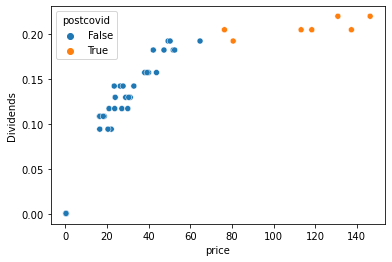

In [3]:

merged=pd.merge(price,dividends,on='Date')
merged['postcovid']=merged['Date']>datetime(2020,1,1)
sns.scatterplot(x='Open',y='Dividends',hue='postcovid',data=merged)
plt.xlabel('price')
plt.show()


The relationship is proportional until the start of the pandemic.

Now let's see the percentage that represent the dividends respect the price of the stock.

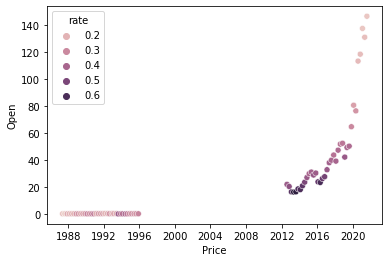

In [4]:

merged['rate']=merged['Dividends']/merged['Open']*100
sns.scatterplot(x='Date',y='Open',hue='rate',data=merged)
plt.xlabel('Date')
plt.xlabel('Price')
plt.show()

In [ ]:
merged.groupby('postcovid')['rate'].describe()

So does the covid affect the dividends percentaje respect the price of the stock market?We should take a look in more stocks.

 Now let's see what is the result of a dividends date over the apple stock price.

In [5]:
dividends=dividends.sort_values('Date')
new_dataframe=pd.DataFrame()
auxiliar_dataframe=pd.DataFrame()
group=0
for tup in dividends.itertuples():
    dates=[ tup[1]+timedelta(days=i) for i in range(-10,11,1)]
    auxiliar_dataframe=pd.DataFrame({'Date':dates,'Group':[group for i in range(21)]})
    new_dataframe=pd.concat([auxiliar_dataframe,new_dataframe])
    group+=1
print(new_dataframe)

         Date  Group
0  2021-07-27     71
1  2021-07-28     71
2  2021-07-29     71
3  2021-07-30     71
4  2021-07-31     71
..        ...    ...
16 1987-05-17      0
17 1987-05-18      0
18 1987-05-19      0
19 1987-05-20      0
20 1987-05-21      0

[1512 rows x 2 columns]


In [11]:
merged2=pd.merge(new_dataframe,price)
merged2['dividends_date']=merged2['Date'].isin(dividends['Date'])
merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 1050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1051 non-null   datetime64[ns]
 1   Group           1051 non-null   int64         
 2   Open            1051 non-null   float64       
 3   High            1051 non-null   float64       
 4   Low             1051 non-null   float64       
 5   Close           1051 non-null   float64       
 6   Adj Close       1051 non-null   float64       
 7   Volume          1051 non-null   int64         
 8   dividends_date  1051 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(5), int64(2)
memory usage: 74.9 KB


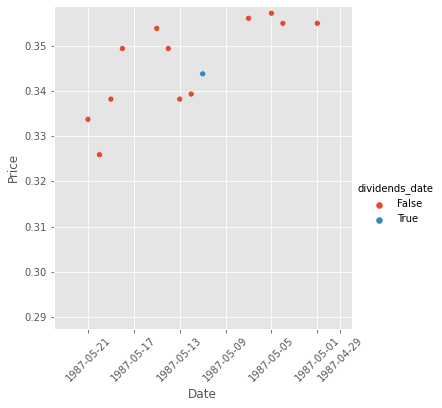

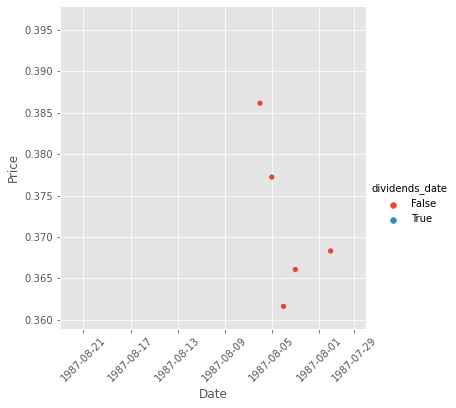

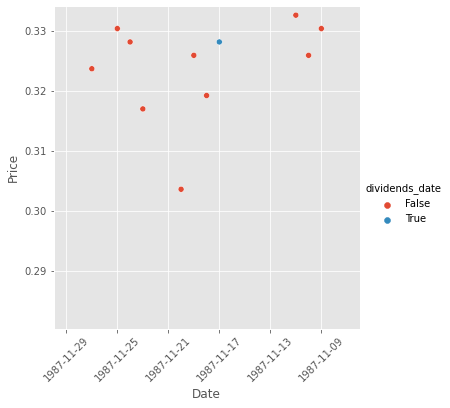

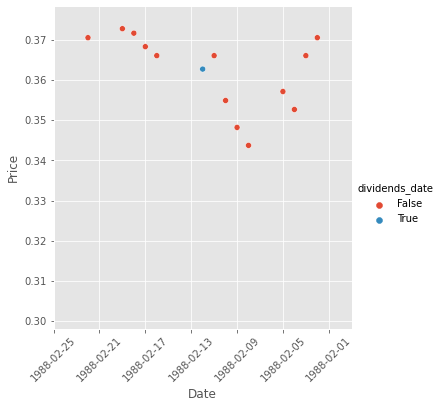

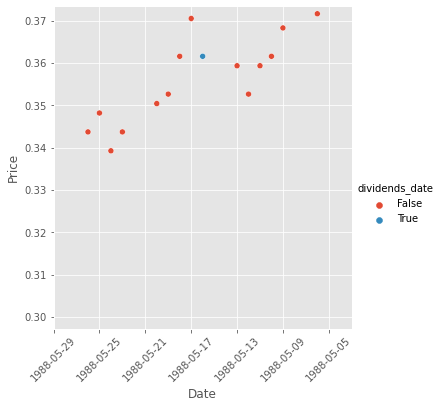

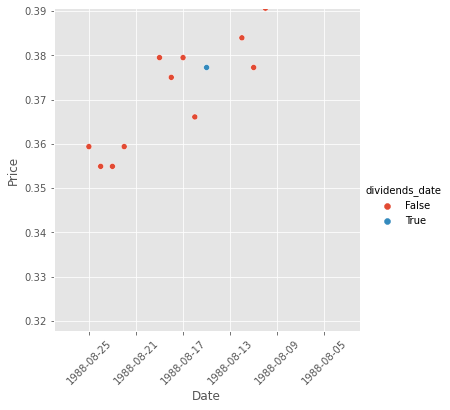

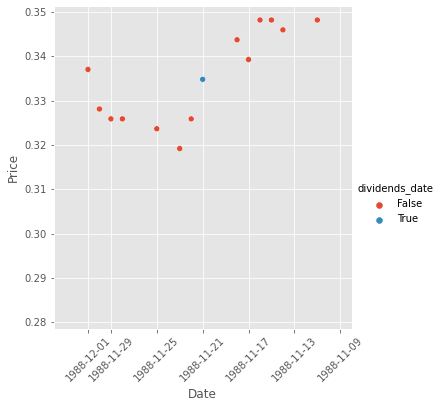

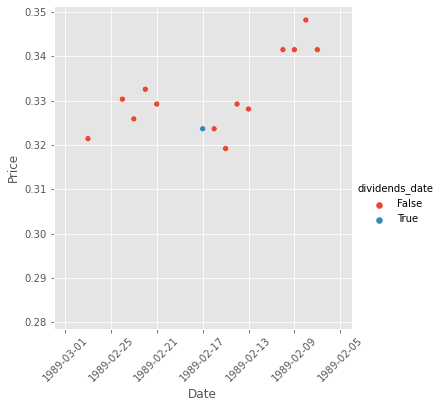

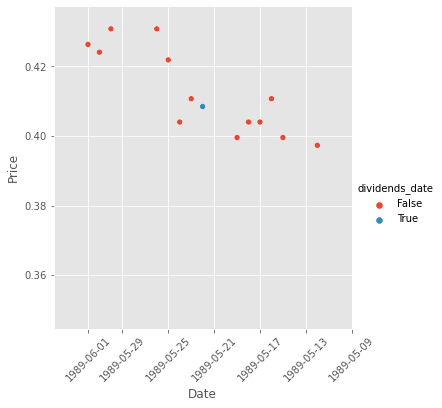

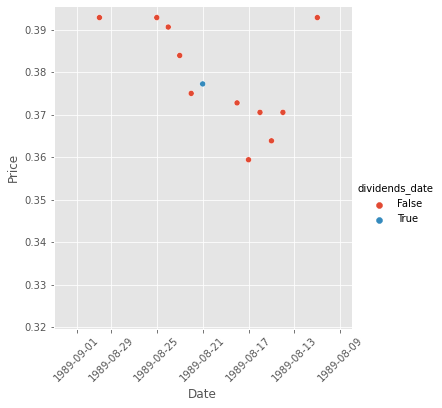

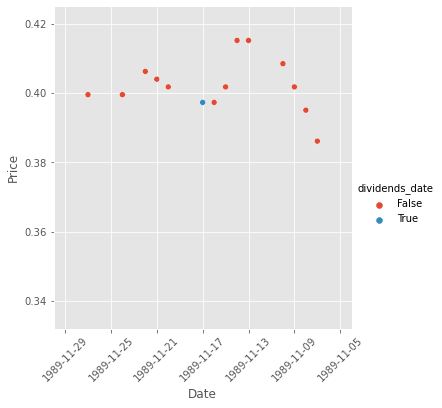

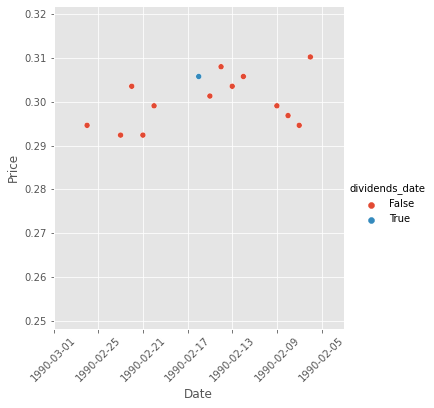

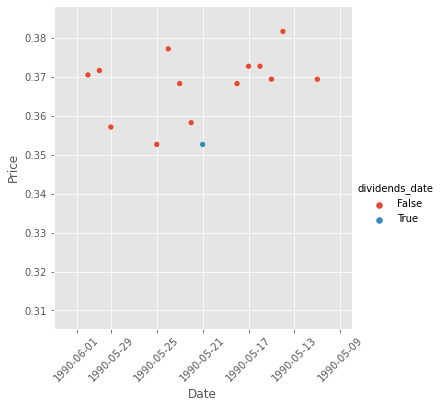

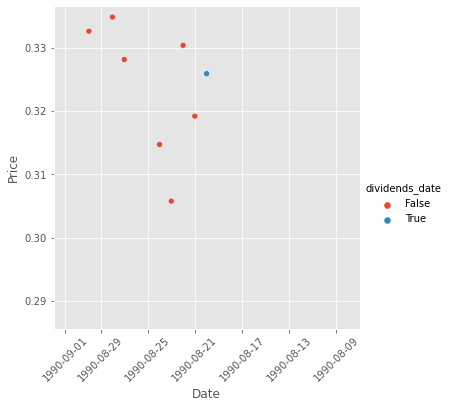

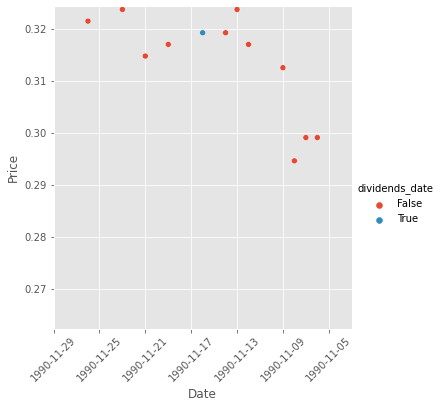

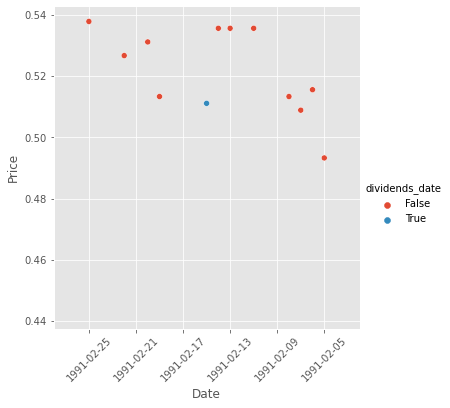

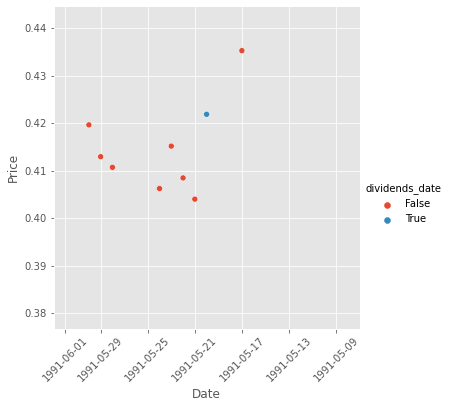

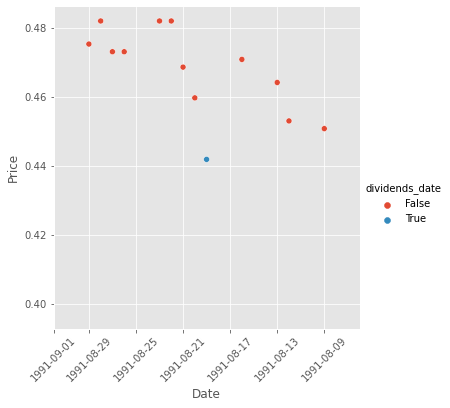

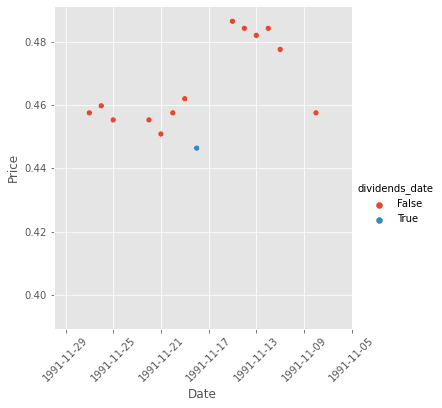

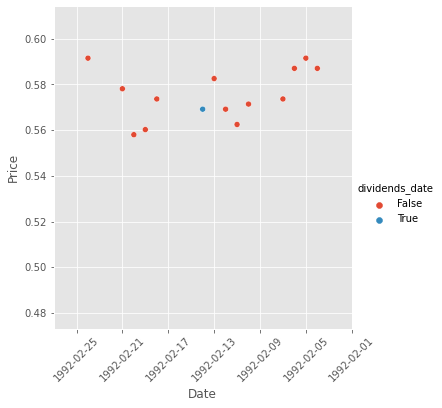

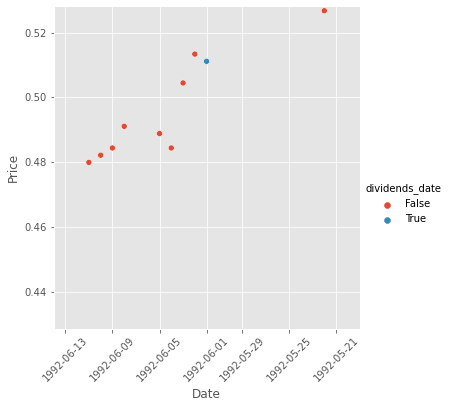

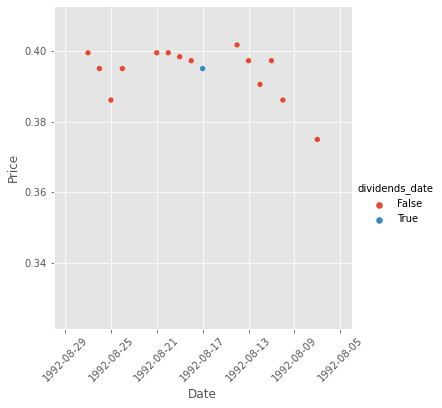

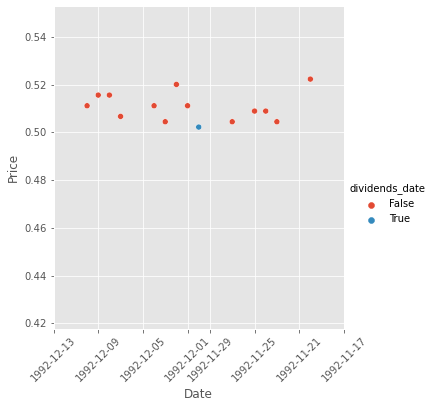

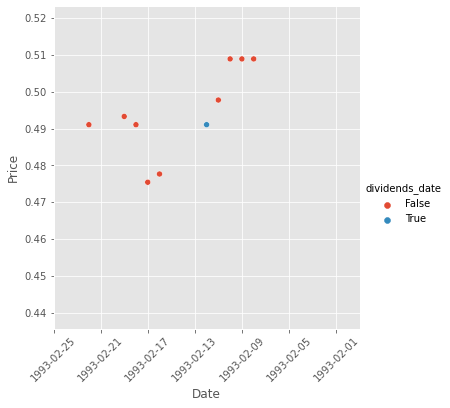

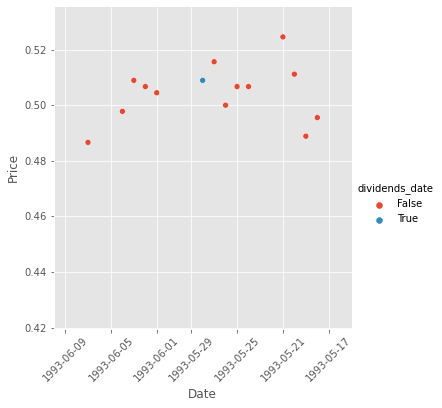

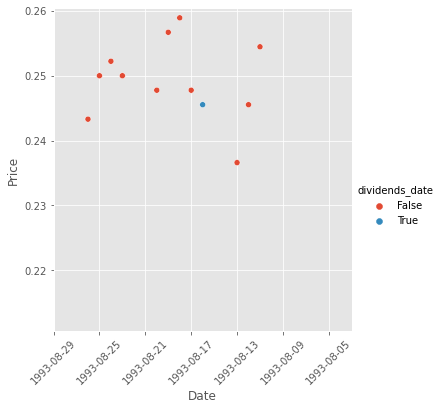

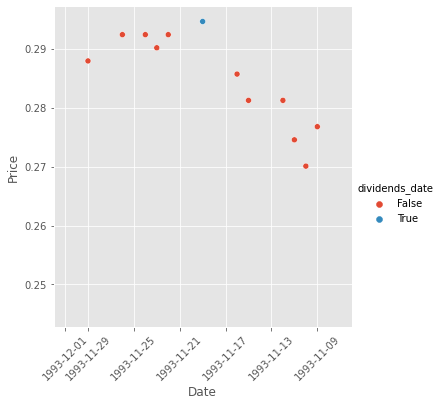

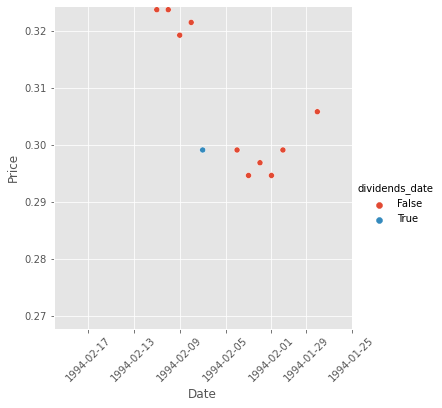

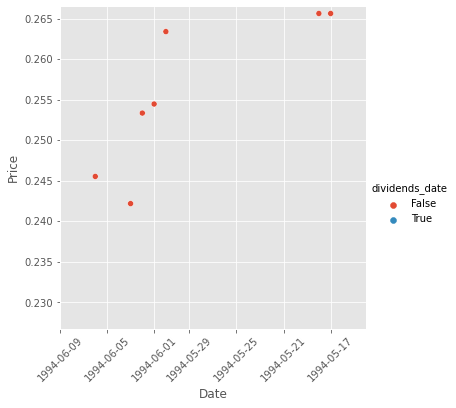

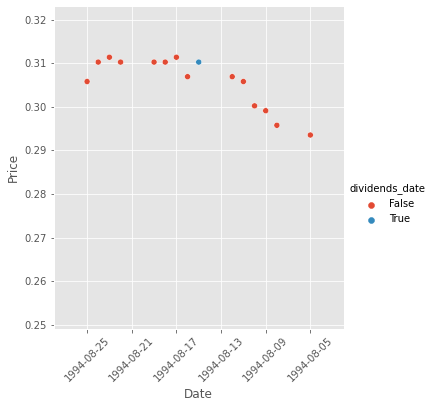

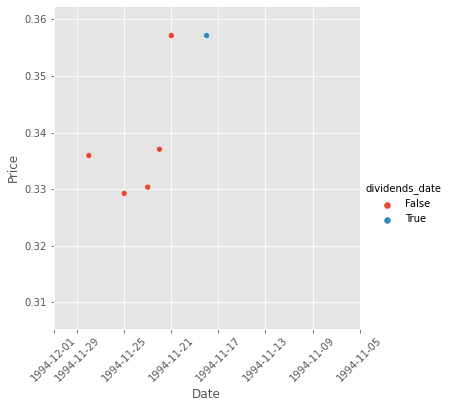

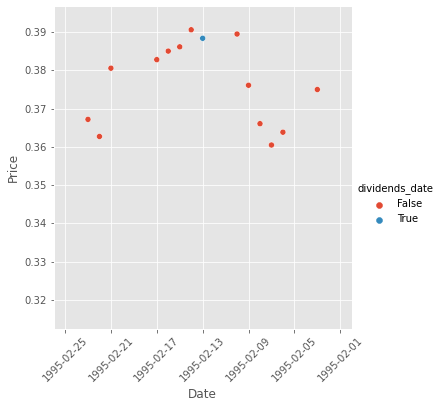

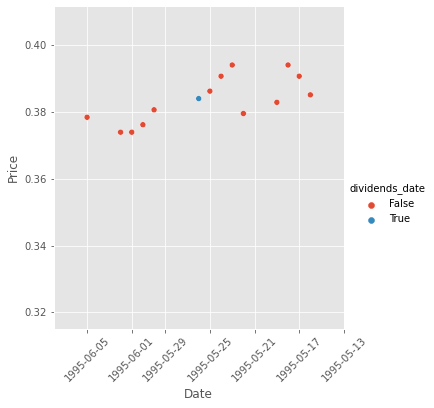

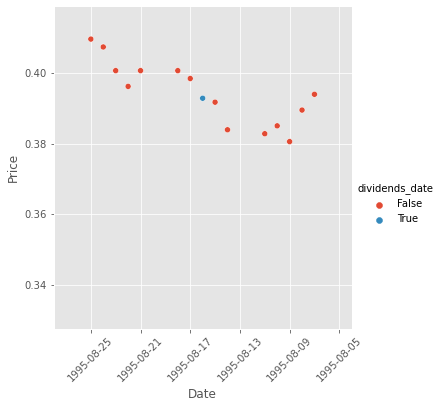

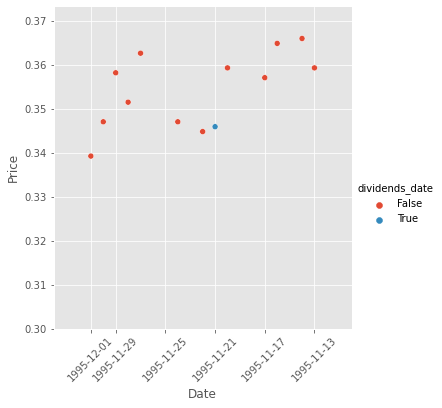

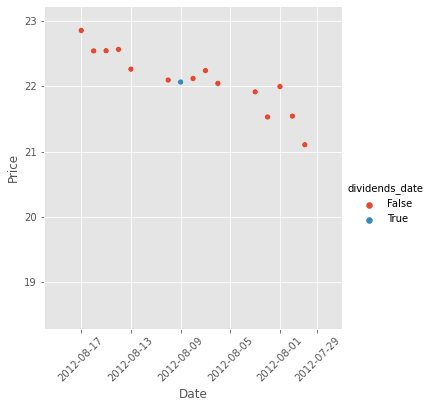

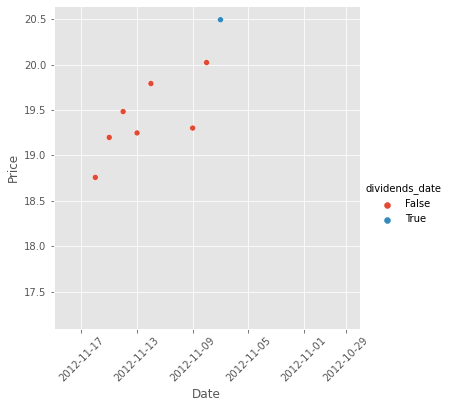

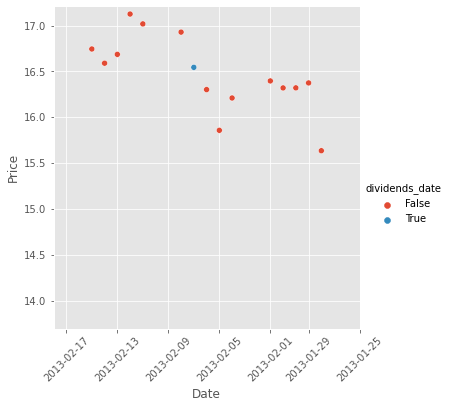

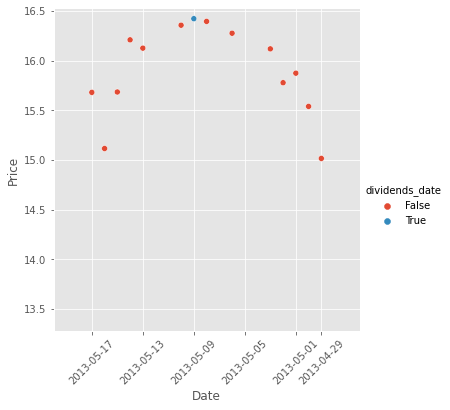

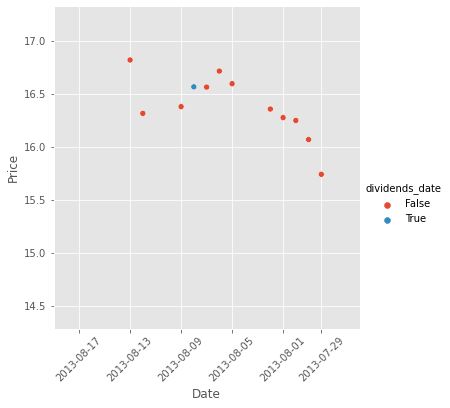

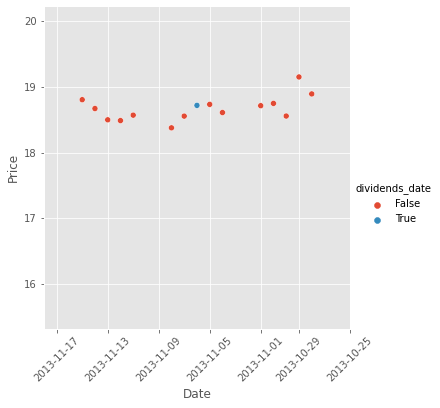

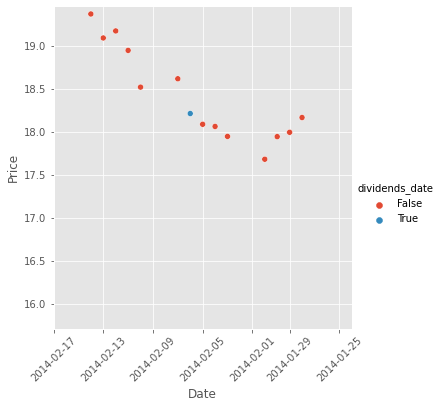

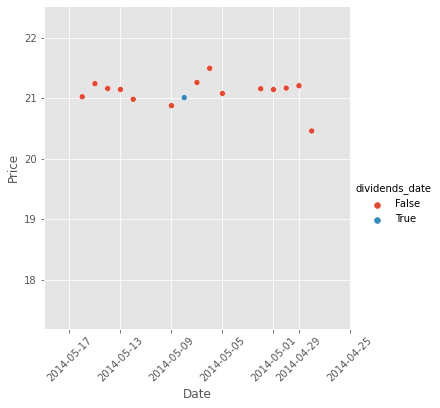

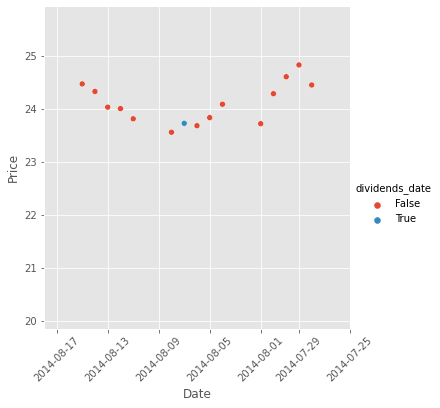

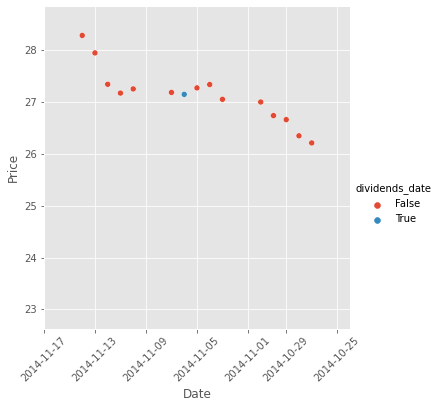

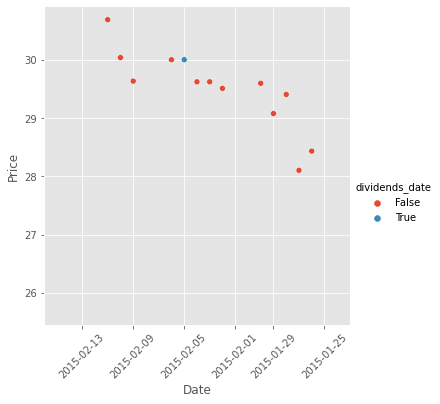

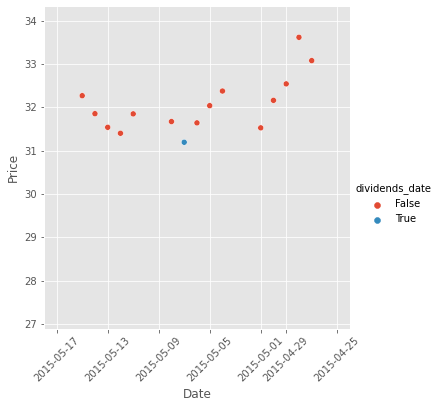

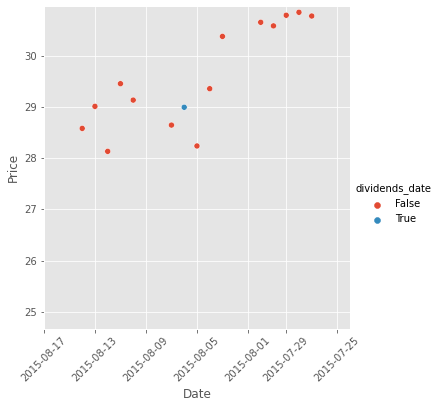

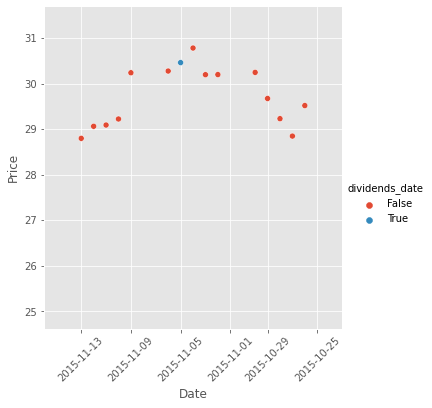

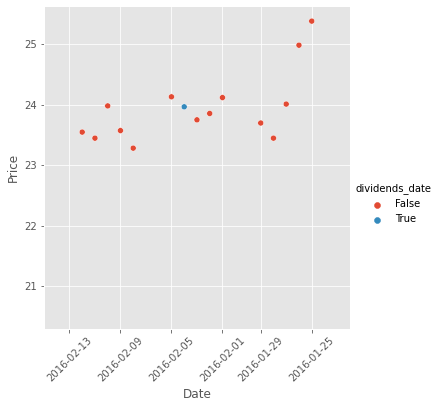

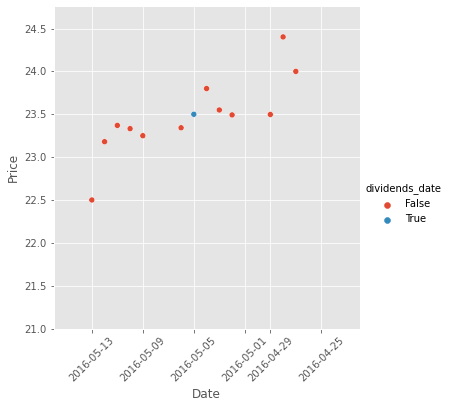

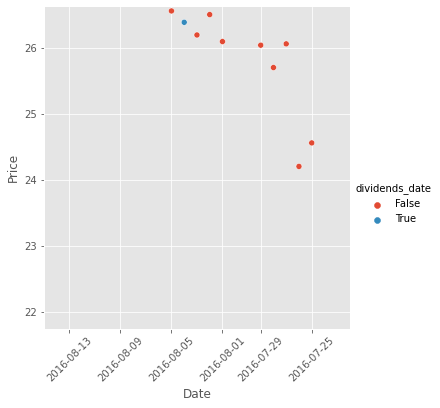

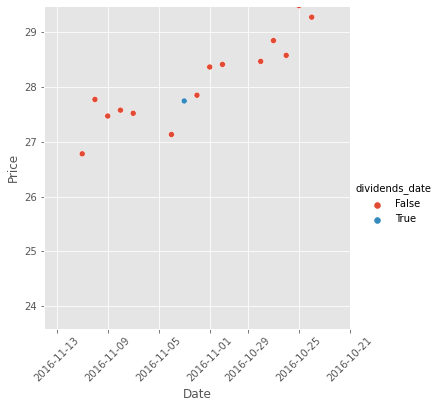

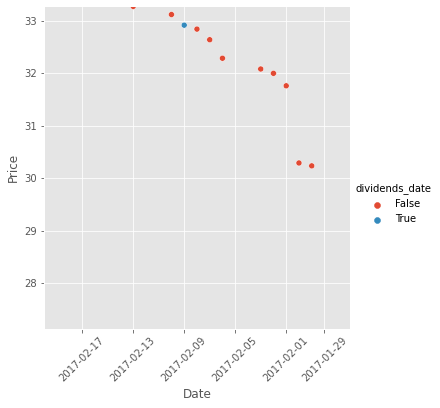

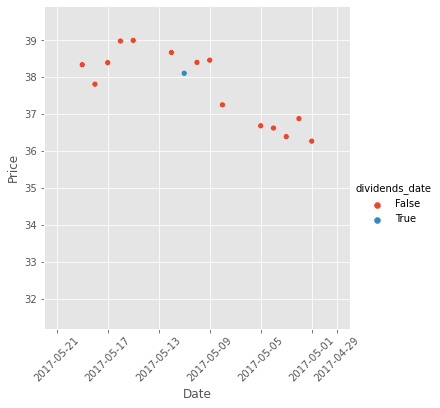

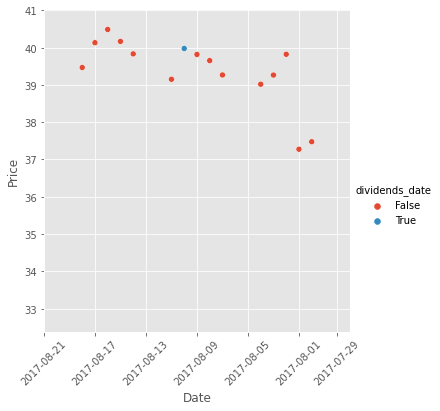

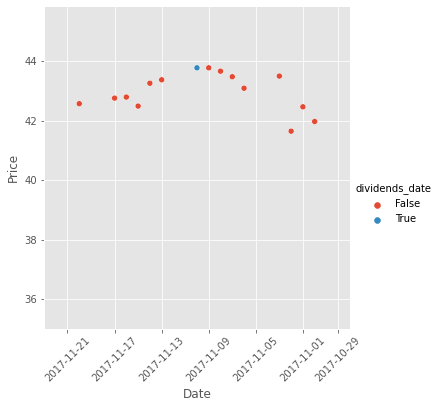

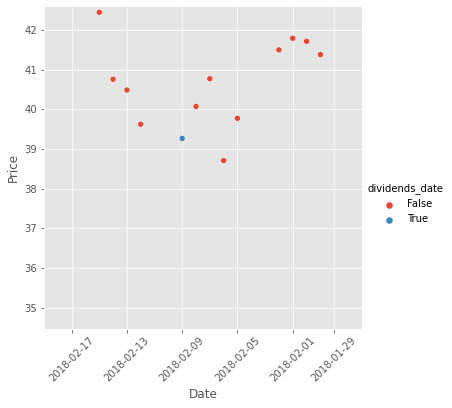

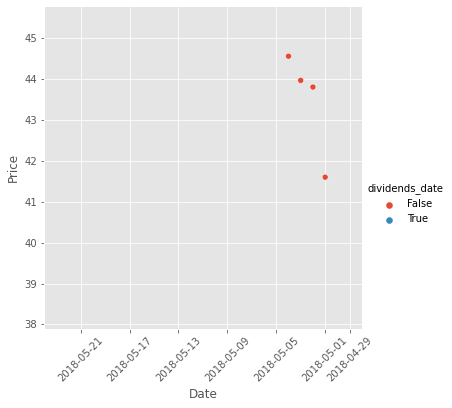

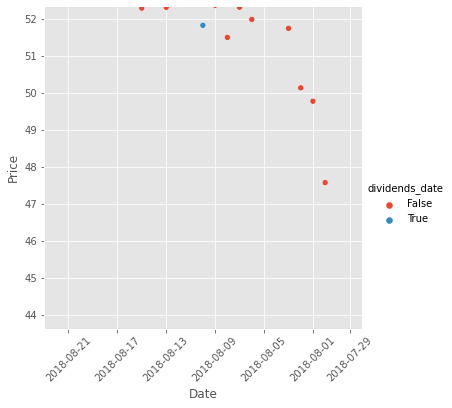

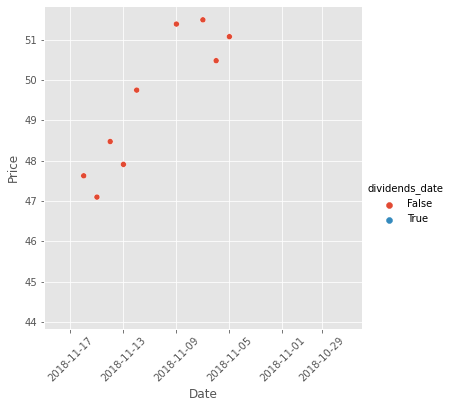

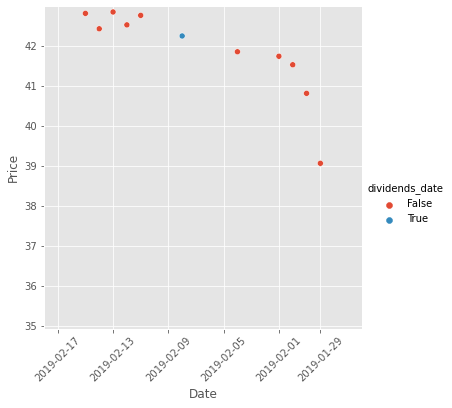

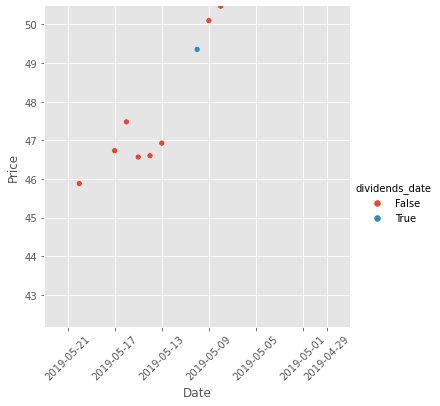

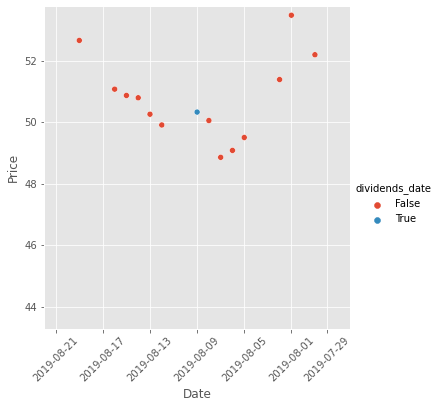

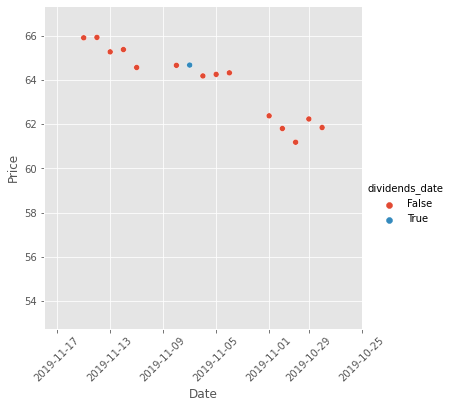

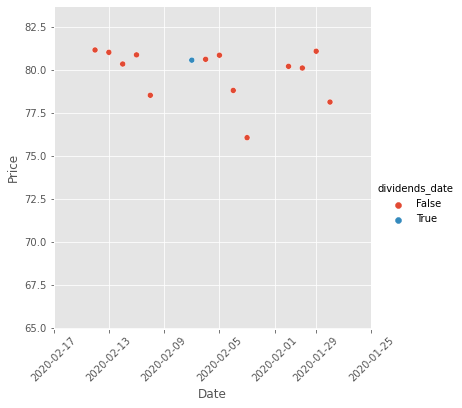

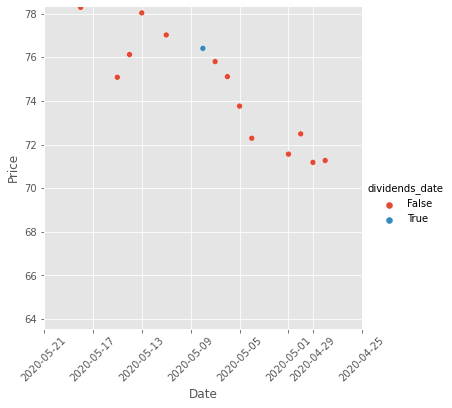

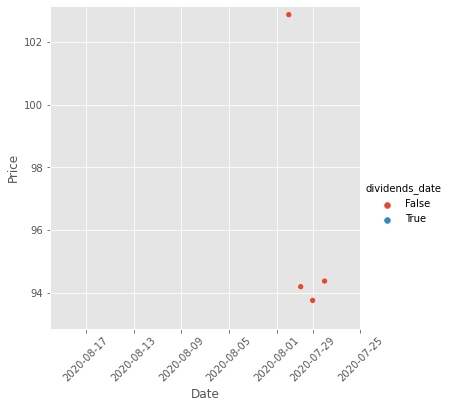

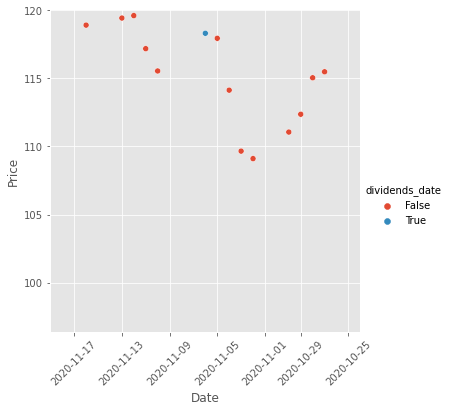

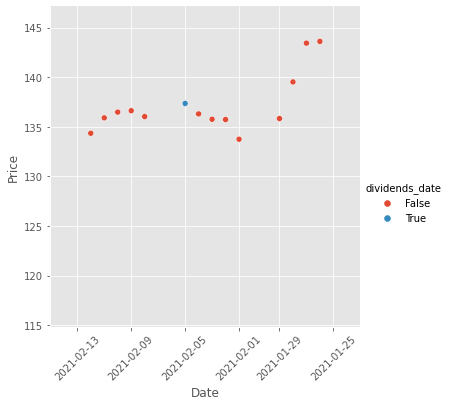

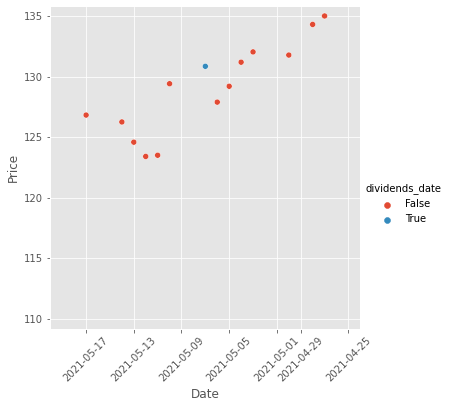

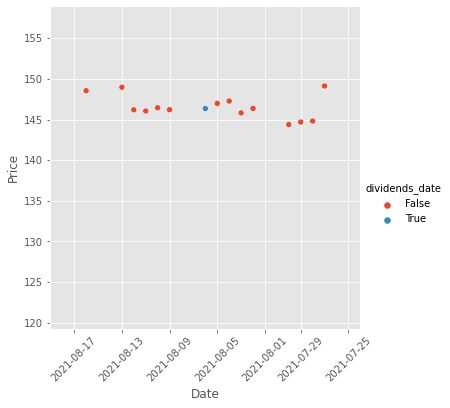

In [23]:
mins=merged2.groupby('Group')['Open'].max()
maxs=merged2.groupby('Group')['Open'].min()
Xmins=merged2.groupby('Group')['Date'].max()
Xmaxs=merged2.groupby('Group')['Date'].min()
for i in range(72):
    plt.style.use('ggplot')
    g=sns.relplot(x="Date", y="Open",hue='dividends_date', data=merged2[merged2['Group']==i].sort_values('Date'),kind="scatter")
    g.ax.set_ylim([0.8*mins[i],1.1*maxs[i]])
    g.ax.set_xlim([Xmins[i]+timedelta(days=3),Xmaxs[i]-timedelta(days=3)])
    plt.xticks(rotation=45)
    plt.ylabel('Price')
    plt.show()





